In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [3]:
# # np load tmp
# with open('../params/2023520-213027-scaled-int-numpy-vgg-cifar10/running_acc.npy', 'rb') as fp:
#     running_acc = np.load(fp)
#
# with open('../params/2023520-213027-scaled-int-numpy-vgg-cifar10/running_loss.npy', 'rb') as fp:
#     running_loss = np.load(fp)
#
# with open('../params/2023520-213027-scaled-int-numpy-vgg-cifar10/running_curr_loss.npy', 'rb') as fp:
#     running_curr_loss = np.load(fp)
#
# # torch load tmp
# checkpoint = torch.load('../params/torch-vgg-cifar10.pth')
# running_acc = checkpoint['running_acc']
# running_loss = checkpoint['running_loss']
# running_curr_loss = checkpoint['running_curr_loss']

# plot tmp
# plt.figure(figsize=(10, 5))
# plt.plot(list(range(len(running_loss_relu))), running_loss_relu)
# plt.plot(list(range(len(running_loss_net))), running_loss_net)
# plt.plot(list(range(len(running_loss_ff))), running_loss_ff)
# plt.ylabel('Average loss in 10 iterations')
# plt.xlabel('Number of iterations / 10')
# plt.title('Average Loss vs. Number of Iterations\nBatch Size: 256')
# plt.legend(['Real Domain - ReLU', 'Real Domain', 'Finite Field Domain'], loc='upper right')
# plt.savefig('avg_loss_batch_256_vgg_cifar10.jpg', dpi=300)
# plt.show()
#
# plt.figure(figsize=(10, 5))
# plt.plot(list(range(len(running_curr_loss_relu))), running_curr_loss_relu)
# plt.plot(list(range(len(running_curr_loss_net))), running_curr_loss_net)
# plt.plot(list(range(len(running_curr_loss_ff))), running_curr_loss_ff)
# plt.ylabel('Loss')
# plt.xlabel('Number of iterations')
# plt.title('Loss vs. Number of Iterations\nBatch Size: 256')
# plt.legend(['Real Domain - ReLU', 'Real Domain', 'Finite Field Domain'], loc='upper right')
# plt.savefig('loss_batch_256_vgg_cifar10.jpg', dpi=300)
# plt.show()
#
# plt.figure(figsize=(10, 5))
# plt.plot(list(range(len(running_acc_relu))), running_acc_relu)
# plt.plot(list(range(len(running_acc_net))), running_acc_net)
# plt.plot(list(range(len(running_acc_ff))), running_acc_ff)
# plt.ylabel('Accuracy')
# plt.xlabel('Number of iterations')
# locs, labels = plt.xticks()
# plt.xticks(locs[1:-1], [str(int(x * 10)) for x in locs[1:-1]])
# plt.title('Accuracy vs. Number of Iterations\nBatch Size: 256')
# plt.legend(['Real Domain - ReLU', 'Real Domain', 'Finite Field Domain'], loc='lower right')
# plt.savefig('acc_batch_256_vgg_cifar10.jpg', dpi=300)
# plt.show()

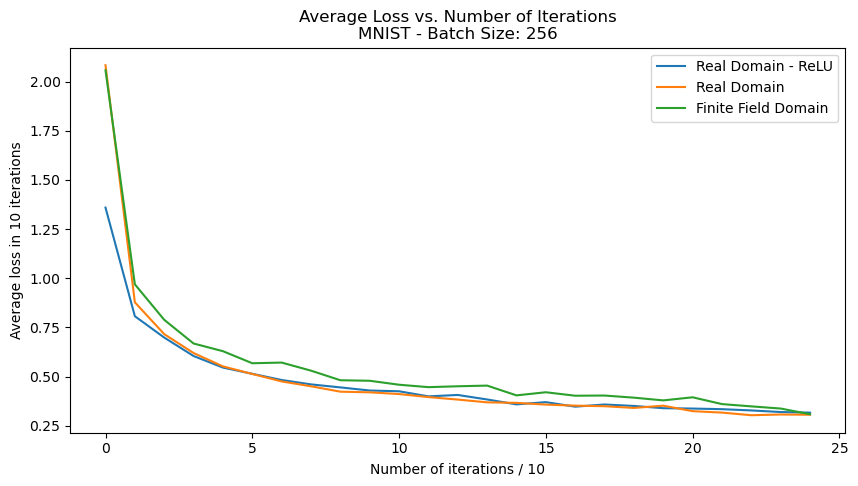

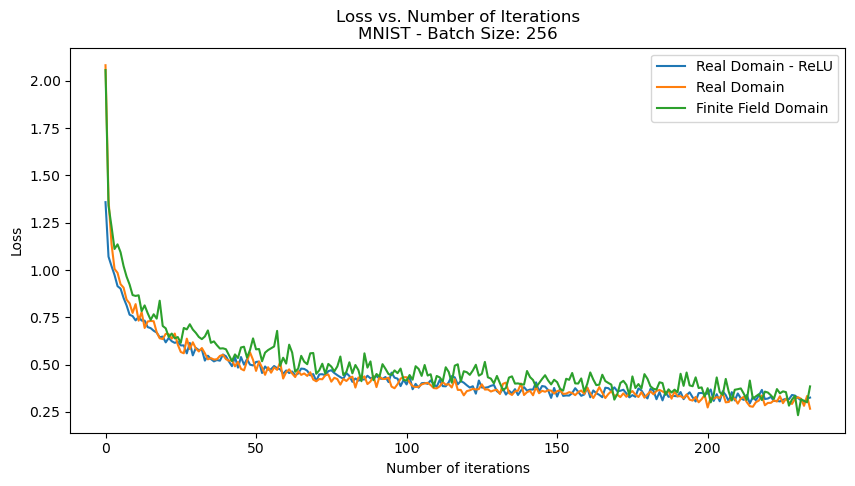

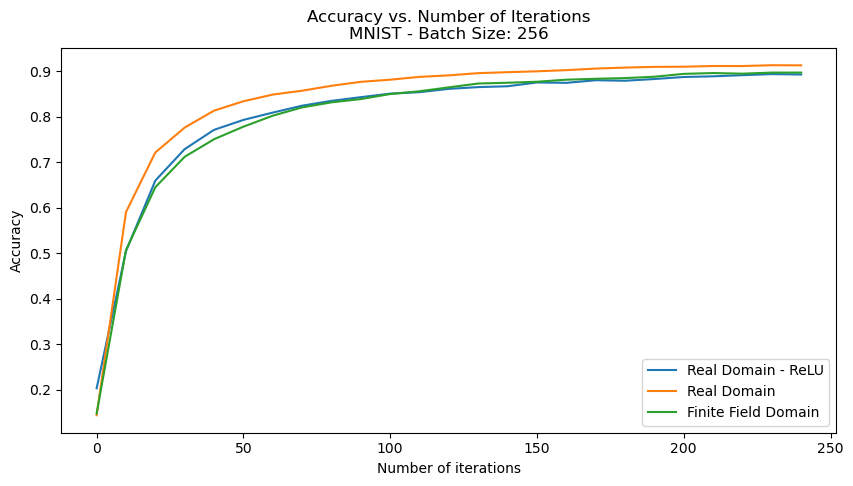

In [2]:
# MNIST
with open('../params/2023522-235440-scaled-ff-numpy-mnist/running_acc.npy', 'rb') as fp:
    running_acc_ff_mnist = np.load(fp)

with open('../params/2023522-235440-scaled-ff-numpy-mnist/running_loss.npy', 'rb') as fp:
    running_loss_ff_mnist = np.load(fp)

with open('../params/2023522-235440-scaled-ff-numpy-mnist/running_curr_loss.npy', 'rb') as fp:
    running_curr_loss_ff_mnist = np.load(fp)

checkpoint = torch.load('../params/net-mnist.pth')
running_acc_net_mnist = checkpoint['running_acc']
running_loss_net_mnist = checkpoint['running_loss']
running_curr_loss_net_mnist = checkpoint['running_curr_loss']

checkpoint = torch.load('../params/torch-mnist.pth')
running_acc_torch_mnist = checkpoint['running_acc']
running_loss_torch_mnist = checkpoint['running_loss']
running_curr_loss_torch_mnist = checkpoint['running_curr_loss']

plt.figure(figsize=(10, 5))
plt.plot(list(range(len(running_loss_torch_mnist))), running_loss_torch_mnist)
plt.plot(list(range(len(running_loss_net_mnist))), running_loss_net_mnist)
plt.plot(list(range(len(running_loss_ff_mnist))), running_loss_ff_mnist)
plt.ylabel('Average loss in 10 iterations')
plt.xlabel('Number of iterations / 10')
plt.title('Average Loss vs. Number of Iterations\nMNIST - Batch Size: 256')
plt.legend(['Real Domain - ReLU', 'Real Domain', 'Finite Field Domain'], loc='upper right')
plt.savefig('avg_loss_batch_256_mnist.jpg', dpi=300)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(list(range(len(running_curr_loss_torch_mnist))), running_curr_loss_torch_mnist)
plt.plot(list(range(len(running_curr_loss_net_mnist))), running_curr_loss_net_mnist)
plt.plot(list(range(len(running_curr_loss_ff_mnist))), running_curr_loss_ff_mnist)
plt.ylabel('Loss')
plt.xlabel('Number of iterations')
plt.title('Loss vs. Number of Iterations\nMNIST - Batch Size: 256')
plt.legend(['Real Domain - ReLU', 'Real Domain', 'Finite Field Domain'], loc='upper right')
plt.savefig('loss_batch_256_mnist.jpg', dpi=300)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(list(range(len(running_acc_torch_mnist))), [x.item() for x in running_acc_torch_mnist])
plt.plot(list(range(len(running_acc_net_mnist))), running_acc_net_mnist)
plt.plot(list(range(len(running_acc_ff_mnist))), running_acc_ff_mnist)
plt.ylabel('Accuracy')
plt.xlabel('Number of iterations')
locs, labels = plt.xticks()
plt.xticks(locs[1:-1], [str(int(x * 10)) for x in locs[1:-1]])
plt.title('Accuracy vs. Number of Iterations\nMNIST - Batch Size: 256')
plt.legend(['Real Domain - ReLU', 'Real Domain', 'Finite Field Domain'], loc='lower right')
plt.savefig('acc_batch_256_mnist.jpg', dpi=300)
plt.show()

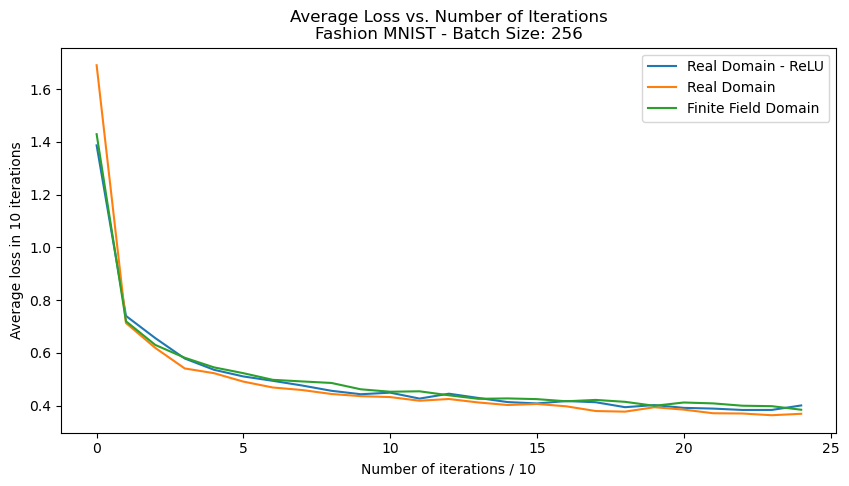

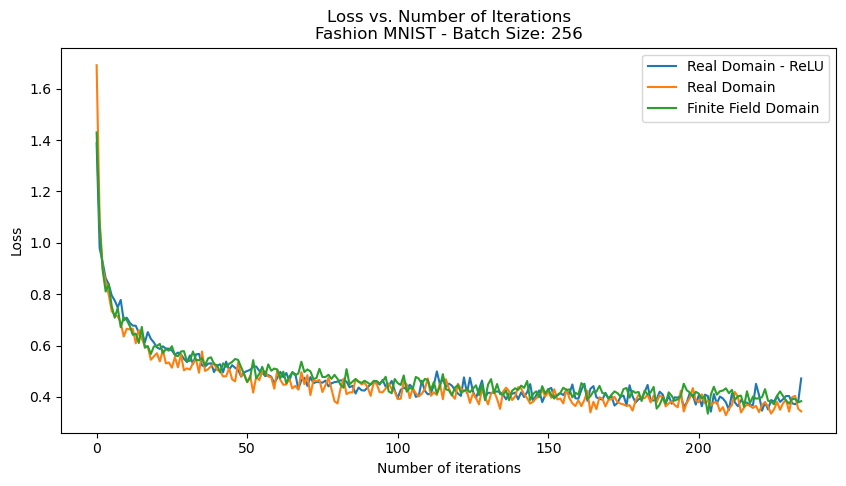

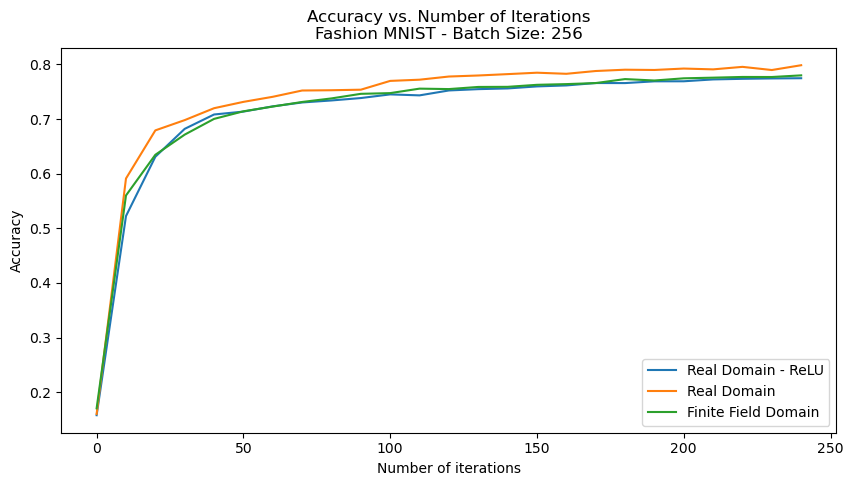

In [25]:
# Fashion MNIST
with open('../params/2023522-233312-scaled-ff-numpy-fashion-mnist/running_acc.npy', 'rb') as fp:
    running_acc_ff_fashion_mnist = np.load(fp)

with open('../params/2023522-233312-scaled-ff-numpy-fashion-mnist/running_loss.npy', 'rb') as fp:
    running_loss_ff_fashion_mnist = np.load(fp)

with open('../params/2023522-233312-scaled-ff-numpy-fashion-mnist/running_curr_loss.npy', 'rb') as fp:
    running_curr_loss_ff_fashion_mnist = np.load(fp)

checkpoint = torch.load('../params/net-fashion-mnist.pth')
running_acc_net_fashion_mnist = checkpoint['running_acc']
running_loss_net_fashion_mnist = checkpoint['running_loss']
running_curr_loss_net_fashion_mnist = checkpoint['running_curr_loss']

checkpoint = torch.load('../params/torch-fashion-mnist.pth')
running_acc_torch_fashion_mnist = checkpoint['running_acc']
running_loss_torch_fashion_mnist = checkpoint['running_loss']
running_curr_loss_torch_fashion_mnist = checkpoint['running_curr_loss']

plt.figure(figsize=(10, 5))
plt.plot(list(range(len(running_loss_torch_fashion_mnist))), running_loss_torch_fashion_mnist)
plt.plot(list(range(len(running_loss_net_fashion_mnist))), running_loss_net_fashion_mnist)
plt.plot(list(range(len(running_loss_ff_fashion_mnist))), running_loss_ff_fashion_mnist)
plt.ylabel('Average loss in 10 iterations')
plt.xlabel('Number of iterations / 10')
plt.title('Average Loss vs. Number of Iterations\nFashion MNIST - Batch Size: 256')
plt.legend(['Real Domain - ReLU', 'Real Domain', 'Finite Field Domain'], loc='upper right')
plt.savefig('avg_loss_batch_256_fashion_mnist.jpg', dpi=300)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(list(range(len(running_curr_loss_torch_fashion_mnist))), running_curr_loss_torch_fashion_mnist)
plt.plot(list(range(len(running_curr_loss_net_fashion_mnist))), running_curr_loss_net_fashion_mnist)
plt.plot(list(range(len(running_curr_loss_ff_fashion_mnist))), running_curr_loss_ff_fashion_mnist)
plt.ylabel('Loss')
plt.xlabel('Number of iterations')
plt.title('Loss vs. Number of Iterations\nFashion MNIST - Batch Size: 256')
plt.legend(['Real Domain - ReLU', 'Real Domain', 'Finite Field Domain'], loc='upper right')
plt.savefig('loss_batch_256_fashion_mnist.jpg', dpi=300)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(list(range(len(running_acc_torch_fashion_mnist))), [x.item() for x in running_acc_torch_fashion_mnist])
plt.plot(list(range(len(running_acc_net_fashion_mnist))), running_acc_net_fashion_mnist)
plt.plot(list(range(len(running_acc_ff_fashion_mnist))), running_acc_ff_fashion_mnist)
plt.ylabel('Accuracy')
plt.xlabel('Number of iterations')
locs, labels = plt.xticks()
plt.xticks(locs[1:-1], [str(int(x * 10)) for x in locs[1:-1]])
plt.title('Accuracy vs. Number of Iterations\nFashion MNIST - Batch Size: 256')
plt.legend(['Real Domain - ReLU', 'Real Domain', 'Finite Field Domain'], loc='lower right')
plt.savefig('acc_batch_256_fashion_mnist.jpg', dpi=300)
plt.show()

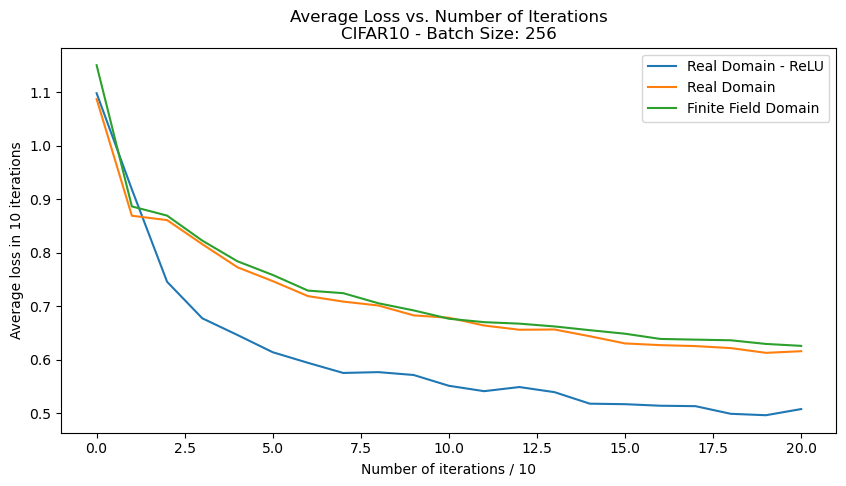

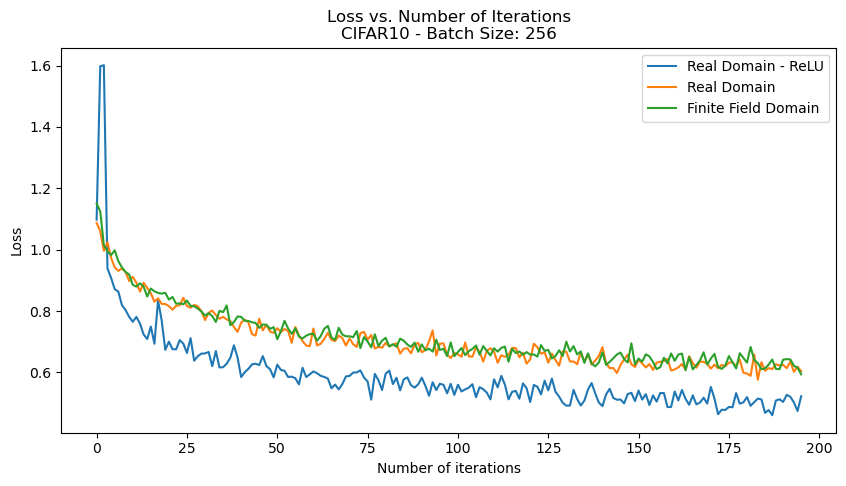

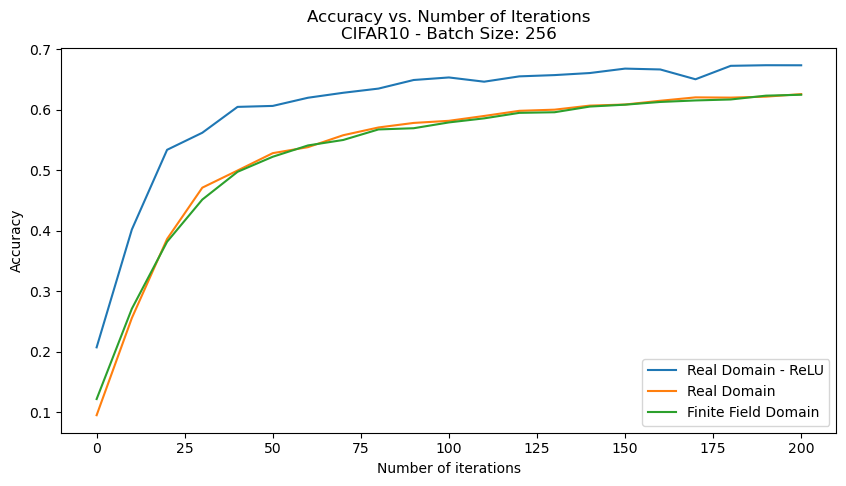

In [26]:
# CIFAR10
with open('../params/2023520-214235-scaled-ff-numpy-vgg-cifar10/running_acc.npy', 'rb') as fp:
    running_acc_ff_cifar10 = np.load(fp)

with open('../params/2023520-214235-scaled-ff-numpy-vgg-cifar10/running_loss.npy', 'rb') as fp:
    running_loss_ff_cifar10 = np.load(fp)

with open('../params/2023520-214235-scaled-ff-numpy-vgg-cifar10/running_curr_loss.npy', 'rb') as fp:
    running_curr_loss_ff_cifar10 = np.load(fp)

checkpoint = torch.load('../params/net-vgg-cifar10.pth')
running_acc_net_cifar10 = checkpoint['running_acc']
running_loss_net_cifar10 = checkpoint['running_loss']
running_curr_loss_net_cifar10 = checkpoint['running_curr_loss']

checkpoint = torch.load('../params/torch-vgg-cifar10.pth')
running_acc_torch_cifar10 = checkpoint['running_acc']
running_loss_torch_cifar10 = checkpoint['running_loss']
running_curr_loss_torch_cifar10 = checkpoint['running_curr_loss']

plt.figure(figsize=(10, 5))
plt.plot(list(range(len(running_loss_torch_cifar10))), running_loss_torch_cifar10)
plt.plot(list(range(len(running_loss_net_cifar10))), running_loss_net_cifar10)
plt.plot(list(range(len(running_loss_ff_cifar10))), running_loss_ff_cifar10)
plt.ylabel('Average loss in 10 iterations')
plt.xlabel('Number of iterations / 10')
plt.title('Average Loss vs. Number of Iterations\nCIFAR10 - Batch Size: 256')
plt.legend(['Real Domain - ReLU', 'Real Domain', 'Finite Field Domain'], loc='upper right')
plt.savefig('avg_loss_batch_256_cifar10.jpg', dpi=300)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(list(range(len(running_curr_loss_torch_cifar10))), running_curr_loss_torch_cifar10)
plt.plot(list(range(len(running_curr_loss_net_cifar10))), running_curr_loss_net_cifar10)
plt.plot(list(range(len(running_curr_loss_ff_cifar10))), running_curr_loss_ff_cifar10)
plt.ylabel('Loss')
plt.xlabel('Number of iterations')
plt.title('Loss vs. Number of Iterations\nCIFAR10 - Batch Size: 256')
plt.legend(['Real Domain - ReLU', 'Real Domain', 'Finite Field Domain'], loc='upper right')
plt.savefig('loss_batch_256_cifar10.jpg', dpi=300)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(list(range(len(running_acc_torch_cifar10))), [x.item() for x in running_acc_torch_cifar10])
plt.plot(list(range(len(running_acc_net_cifar10))), running_acc_net_cifar10)
plt.plot(list(range(len(running_acc_ff_cifar10))), running_acc_ff_cifar10)
plt.ylabel('Accuracy')
plt.xlabel('Number of iterations')
locs, labels = plt.xticks()
plt.xticks(locs[1:-1], [str(int(x * 10)) for x in locs[1:-1]])
plt.title('Accuracy vs. Number of Iterations\nCIFAR10 - Batch Size: 256')
plt.legend(['Real Domain - ReLU', 'Real Domain', 'Finite Field Domain'], loc='lower right')
plt.savefig('acc_batch_256_cifar10.jpg', dpi=300)
plt.show()

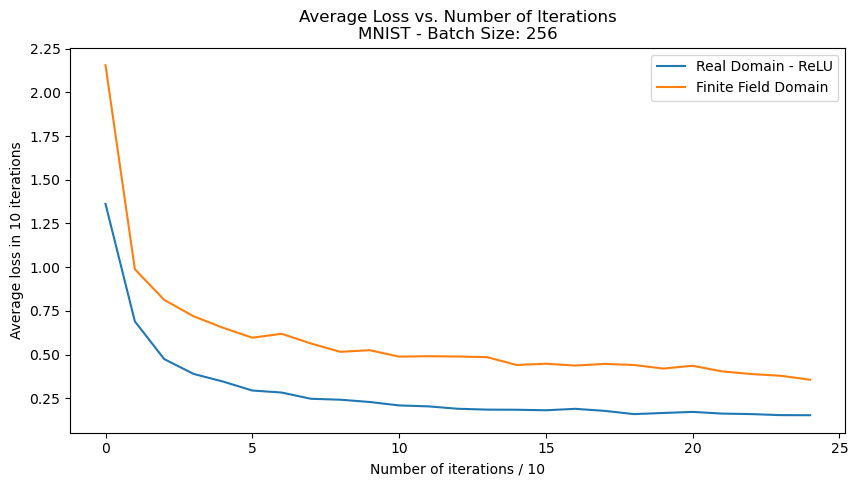

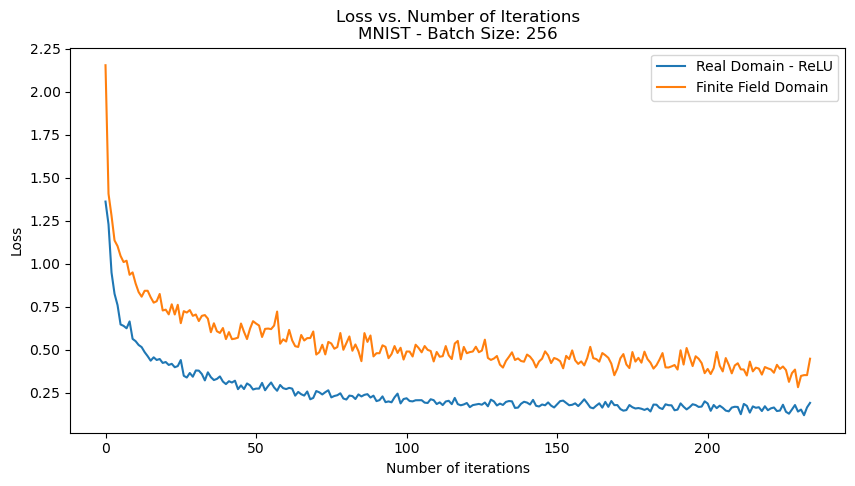

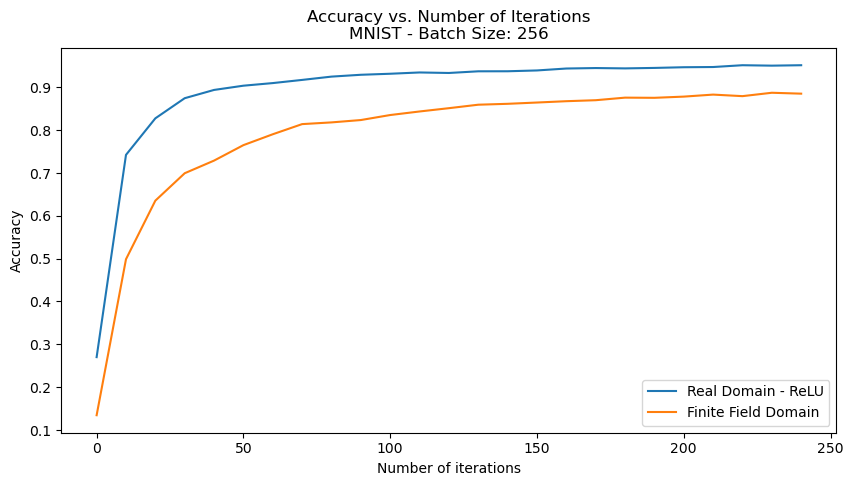

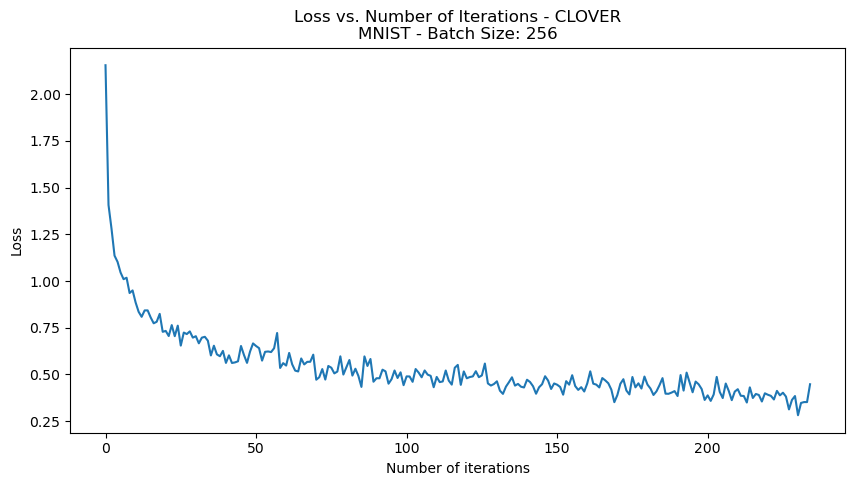

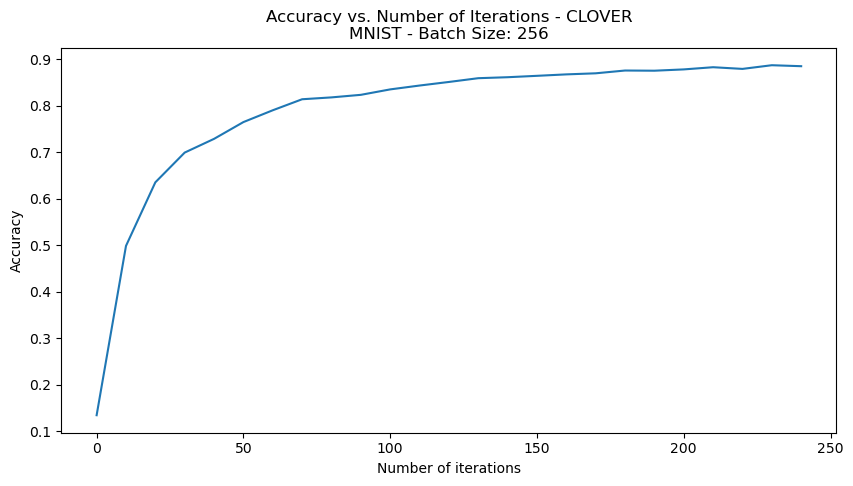

In [6]:
# MNIST
with open('../params/2023524-165641-mnist-ff-clover/running_acc.npy', 'rb') as fp:
    running_acc_ff_mnist_adam_clover = np.load(fp)

with open('../params/2023524-165641-mnist-ff-clover/running_loss.npy', 'rb') as fp:
    running_loss_ff_mnist_adam_clover = np.load(fp)

with open('../params/2023524-165641-mnist-ff-clover/running_curr_loss.npy', 'rb') as fp:
    running_curr_loss_ff_mnist_adam_clover = np.load(fp)

checkpoint = torch.load('../params/torch-mnist-adam.pth')
running_acc_torch_mnist_adam_clover = checkpoint['running_acc']
running_loss_torch_mnist_adam_clover = checkpoint['running_loss']
running_curr_loss_torch_mnist_adam_clover = checkpoint['running_curr_loss']

plt.figure(figsize=(10, 5))
plt.plot(list(range(len(running_loss_torch_mnist_adam_clover))), running_loss_torch_mnist_adam_clover)
plt.plot(list(range(len(running_loss_ff_mnist_adam_clover))), running_loss_ff_mnist_adam_clover)
plt.ylabel('Average loss in 10 iterations')
plt.xlabel('Number of iterations / 10')
plt.title('Average Loss vs. Number of Iterations\nMNIST - Batch Size: 256')
plt.legend(['Real Domain - ReLU', 'Finite Field Domain'], loc='upper right')
plt.savefig('avg_loss_batch_256_mnist_adam_clover.jpg', dpi=300)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(list(range(len(running_curr_loss_torch_mnist_adam_clover))), running_curr_loss_torch_mnist_adam_clover)
plt.plot(list(range(len(running_curr_loss_ff_mnist_adam_clover))), running_curr_loss_ff_mnist_adam_clover)
plt.ylabel('Loss')
plt.xlabel('Number of iterations')
plt.title('Loss vs. Number of Iterations\nMNIST - Batch Size: 256')
plt.legend(['Real Domain - ReLU', 'Finite Field Domain'], loc='upper right')
plt.savefig('loss_batch_256_mnist_adam_clover.jpg', dpi=300)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(list(range(len(running_acc_torch_mnist_adam_clover))), [x.item() for x in running_acc_torch_mnist_adam_clover])
plt.plot(list(range(len(running_acc_ff_mnist_adam_clover))), running_acc_ff_mnist_adam_clover)
plt.ylabel('Accuracy')
plt.xlabel('Number of iterations')
locs, labels = plt.xticks()
plt.xticks(locs[1:-1], [str(int(x * 10)) for x in locs[1:-1]])
plt.title('Accuracy vs. Number of Iterations\nMNIST - Batch Size: 256')
plt.legend(['Real Domain - ReLU', 'Finite Field Domain'], loc='lower right')
plt.savefig('acc_batch_256_mnist_adam_clover.jpg', dpi=300)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(list(range(len(running_curr_loss_ff_mnist_adam_clover))), running_curr_loss_ff_mnist_adam_clover)
plt.ylabel('Loss')
plt.xlabel('Number of iterations')
plt.title('Loss vs. Number of Iterations - CLOVER\nMNIST - Batch Size: 256')
plt.savefig('loss_batch_256_mnist_clover.jpg', dpi=300)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(list(range(len(running_acc_ff_mnist_adam_clover))), running_acc_ff_mnist_adam_clover)
plt.ylabel('Accuracy')
plt.xlabel('Number of iterations')
locs, labels = plt.xticks()
plt.xticks(locs[1:-1], [str(int(x * 10)) for x in locs[1:-1]])
plt.title('Accuracy vs. Number of Iterations - CLOVER\nMNIST - Batch Size: 256')
plt.savefig('acc_batch_256_mnist_clover.jpg', dpi=300)
plt.show()

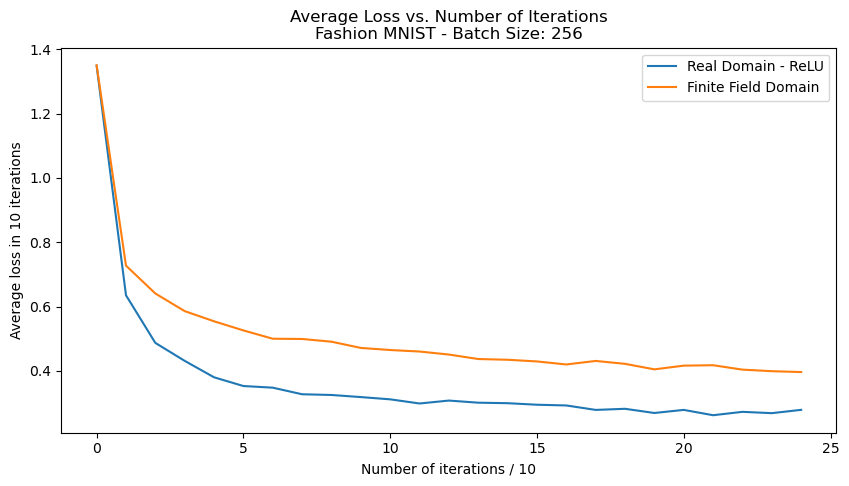

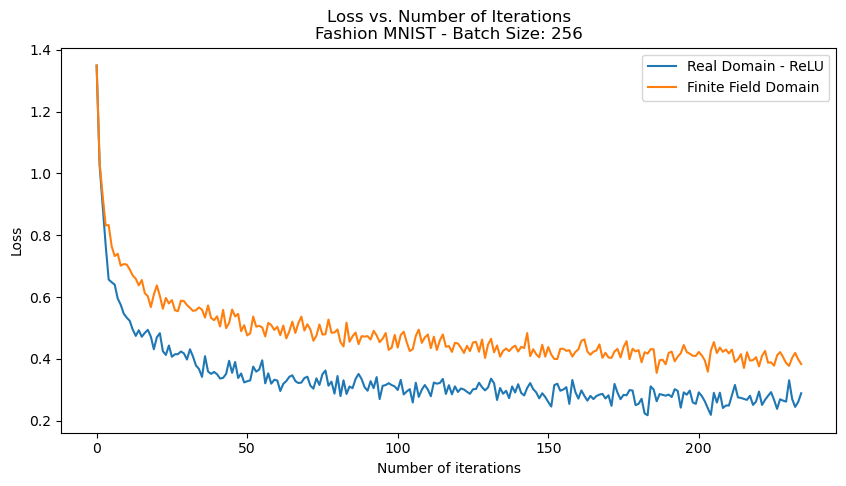

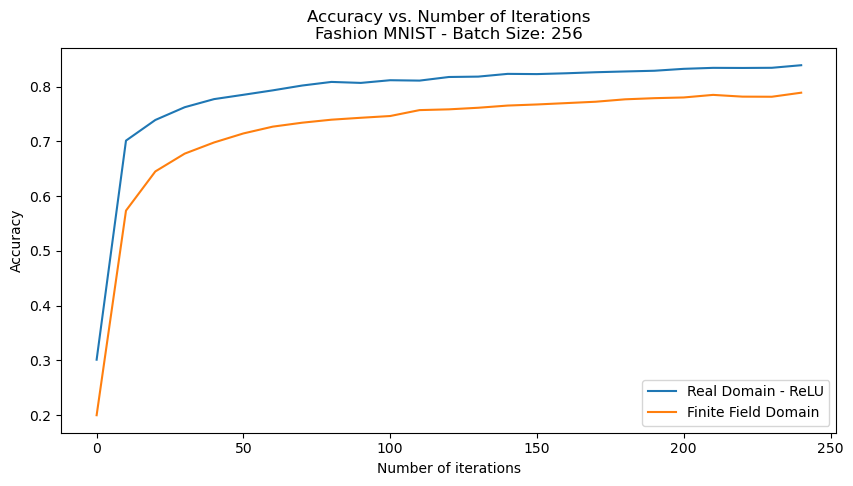

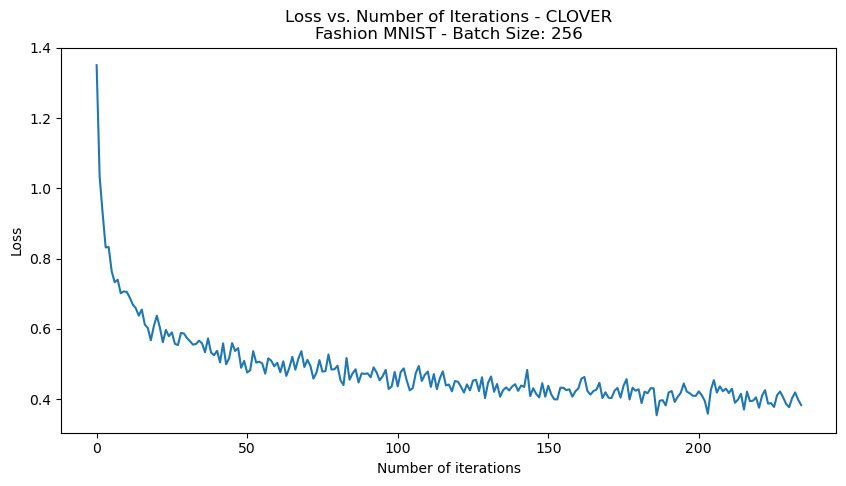

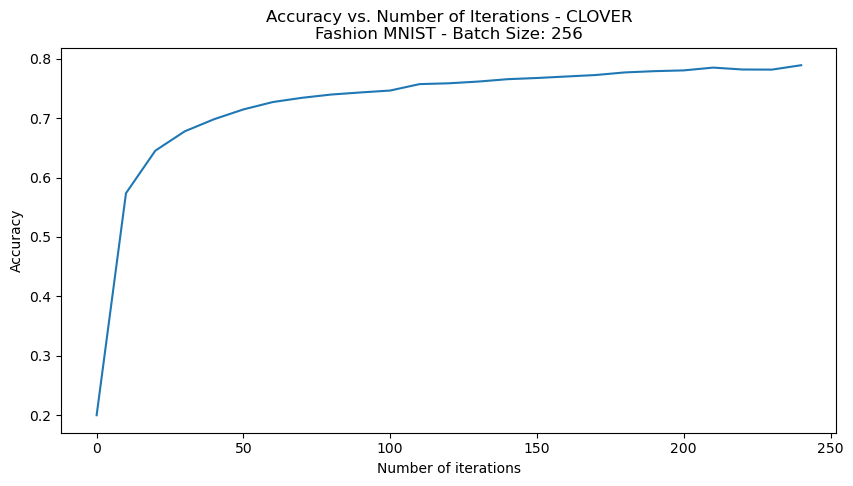

In [7]:
# MNIST
with open('../params/2023524-142234-fashion-mnist-ff-clover/running_acc.npy', 'rb') as fp:
    running_acc_ff_mnist_adam_clover = np.load(fp)

with open('../params/2023524-142234-fashion-mnist-ff-clover/running_loss.npy', 'rb') as fp:
    running_loss_ff_mnist_adam_clover = np.load(fp)

with open('../params/2023524-142234-fashion-mnist-ff-clover/running_curr_loss.npy', 'rb') as fp:
    running_curr_loss_ff_mnist_adam_clover = np.load(fp)

checkpoint = torch.load('../params/torch-fashion-mnist-adam.pth')
running_acc_torch_mnist_adam_clover = checkpoint['running_acc']
running_loss_torch_mnist_adam_clover = checkpoint['running_loss']
running_curr_loss_torch_mnist_adam_clover = checkpoint['running_curr_loss']

plt.figure(figsize=(10, 5))
plt.plot(list(range(len(running_loss_torch_mnist_adam_clover))), running_loss_torch_mnist_adam_clover)
plt.plot(list(range(len(running_loss_ff_mnist_adam_clover))), running_loss_ff_mnist_adam_clover)
plt.ylabel('Average loss in 10 iterations')
plt.xlabel('Number of iterations / 10')
plt.title('Average Loss vs. Number of Iterations\nFashion MNIST - Batch Size: 256')
plt.legend(['Real Domain - ReLU', 'Finite Field Domain'], loc='upper right')
plt.savefig('avg_loss_batch_256_fashion_mnist_adam_clover.jpg', dpi=300)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(list(range(len(running_curr_loss_torch_mnist_adam_clover))), running_curr_loss_torch_mnist_adam_clover)
plt.plot(list(range(len(running_curr_loss_ff_mnist_adam_clover))), running_curr_loss_ff_mnist_adam_clover)
plt.ylabel('Loss')
plt.xlabel('Number of iterations')
plt.title('Loss vs. Number of Iterations\nFashion MNIST - Batch Size: 256')
plt.legend(['Real Domain - ReLU', 'Finite Field Domain'], loc='upper right')
plt.savefig('loss_batch_256_fashion_mnist_adam_clover.jpg', dpi=300)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(list(range(len(running_acc_torch_mnist_adam_clover))), [x.item() for x in running_acc_torch_mnist_adam_clover])
plt.plot(list(range(len(running_acc_ff_mnist_adam_clover))), running_acc_ff_mnist_adam_clover)
plt.ylabel('Accuracy')
plt.xlabel('Number of iterations')
locs, labels = plt.xticks()
plt.xticks(locs[1:-1], [str(int(x * 10)) for x in locs[1:-1]])
plt.title('Accuracy vs. Number of Iterations\nFashion MNIST - Batch Size: 256')
plt.legend(['Real Domain - ReLU', 'Finite Field Domain'], loc='lower right')
plt.savefig('acc_batch_256_fashion_mnist_adam_clover.jpg', dpi=300)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(list(range(len(running_curr_loss_ff_mnist_adam_clover))), running_curr_loss_ff_mnist_adam_clover)
plt.ylabel('Loss')
plt.xlabel('Number of iterations')
plt.title('Loss vs. Number of Iterations - CLOVER\nFashion MNIST - Batch Size: 256')
plt.savefig('loss_batch_256_fashion_mnist_clover.jpg', dpi=300)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(list(range(len(running_acc_ff_mnist_adam_clover))), running_acc_ff_mnist_adam_clover)
plt.ylabel('Accuracy')
plt.xlabel('Number of iterations')
locs, labels = plt.xticks()
plt.xticks(locs[1:-1], [str(int(x * 10)) for x in locs[1:-1]])
plt.title('Accuracy vs. Number of Iterations - CLOVER\nFashion MNIST - Batch Size: 256')
plt.savefig('acc_batch_256_fashion_adam_clover.jpg', dpi=300)
plt.show()

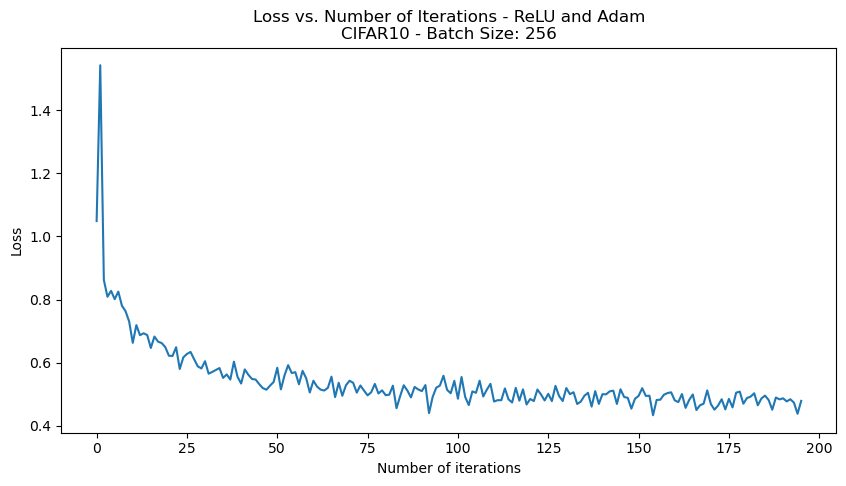

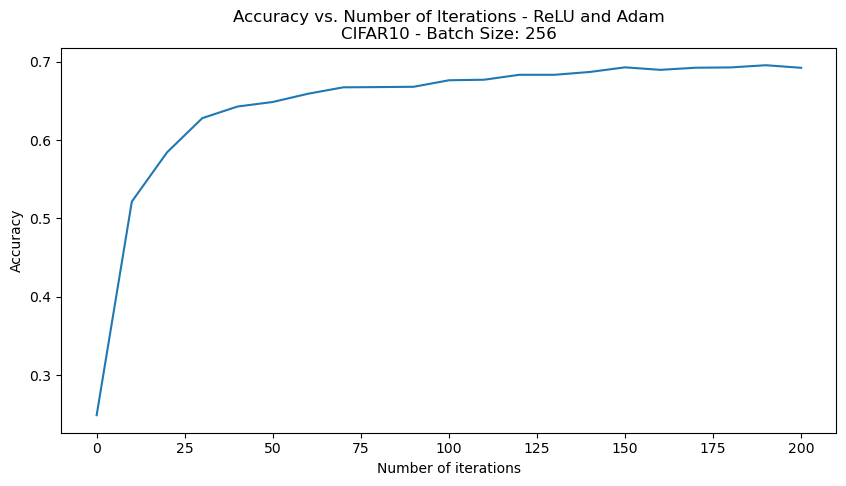

In [9]:
checkpoint = torch.load('../params/torch-vgg-cifar10-adam.pth')
running_acc_torch_cifar10_adam = checkpoint['running_acc']
running_curr_loss_torch_cifar10_adam = checkpoint['running_curr_loss']

plt.figure(figsize=(10, 5))
plt.plot(list(range(len(running_curr_loss_torch_cifar10_adam))), running_curr_loss_torch_cifar10_adam)
plt.ylabel('Loss')
plt.xlabel('Number of iterations')
plt.title('Loss vs. Number of Iterations - ReLU and Adam\nCIFAR10 - Batch Size: 256')
plt.savefig('loss_batch_256_cifar10_adam', dpi=300)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(list(range(len(running_acc_torch_cifar10_adam))), [x.item() for x in running_acc_torch_cifar10_adam])
plt.ylabel('Accuracy')
plt.xlabel('Number of iterations')
locs, labels = plt.xticks()
plt.xticks(locs[1:-1], [str(int(x * 10)) for x in locs[1:-1]])
plt.title('Accuracy vs. Number of Iterations - ReLU and Adam\nCIFAR10 - Batch Size: 256')
plt.savefig('acc_batch_256_cifar10_adam.jpg', dpi=300)
plt.show()